In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import SGD
from keras.preprocessing import image_dataset_from_directory
from keras.metrics import Precision, Recall

In [4]:
train_dir = "./mnist-jpg/train"
test_dir = "./mnist-jpg/test"

In [5]:
train_dataset = image_dataset_from_directory(
    train_dir,
    label_mode='int',
    image_size=(28, 28),
    color_mode='grayscale',
    batch_size=32   
)

test_dataset = image_dataset_from_directory(
    test_dir,
    label_mode='int',
    image_size=(28, 28),
    color_mode='grayscale',
    batch_size=32   
)

Found 60000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [6]:
def normalize_image(image, label):
    return image/255.0, label

In [7]:
train_dataset = train_dataset.map(normalize_image)
test_dataset = test_dataset.map(normalize_image)

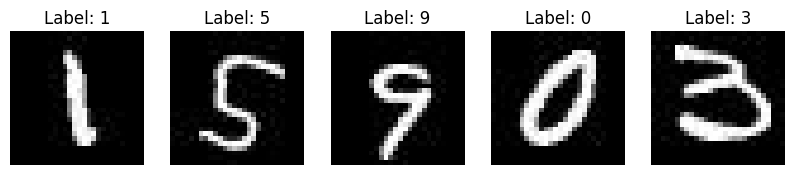

In [8]:
# Display some random train images along with their labels
def display_sample_images(dataset, num_images=5):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(num_images):
            ax = plt.subplot(1, num_images, i + 1)
            plt.imshow(tf.squeeze(images[i]), cmap="gray")
            plt.title(f"Label: {labels[i].numpy()}")
            plt.axis("off")
    plt.show()

display_sample_images(train_dataset)

In [9]:
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(optimizer=SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(train_dataset, epochs=5, validation_data=test_dataset)

Epoch 1/5
1875/1875 [==============================] - 122s 64ms/step - loss: 0.6541 - accuracy: 0.8228 - val_loss: 0.3247 - val_accuracy: 0.9109
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3024 - accuracy: 0.9137 - val_loss: 0.2607 - val_accuracy: 0.9275
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2496 - accuracy: 0.9284 - val_loss: 0.2240 - val_accuracy: 0.9360
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2161 - accuracy: 0.9380 - val_loss: 0.2020 - val_accuracy: 0.9424
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1910 - accuracy: 0.9455 - val_loss: 0.1827 - val_accuracy: 0.9476


In [12]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 [==============================] - 5s 17ms/step - loss: 0.1827 - accuracy: 0.9476
Test Loss: 0.1827
Test Accuracy: 0.9476


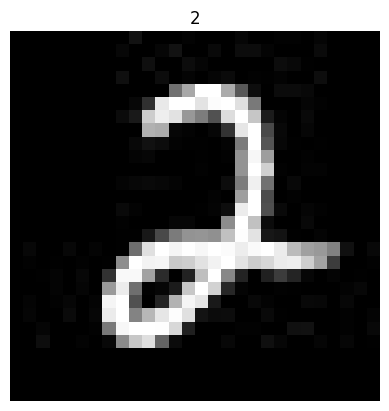

1/1 [==============================] - 0s 21ms/step


In [41]:
for image, label in test_dataset.take(1):
    plt.imshow(image[0], cmap='gray')
    plt.title(str(label[0].numpy()))
    plt.axis("off")
    plt.show()
    
    prediction = np.argmax(model.predict(image), axis=1)[0]
    prediction

In [14]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

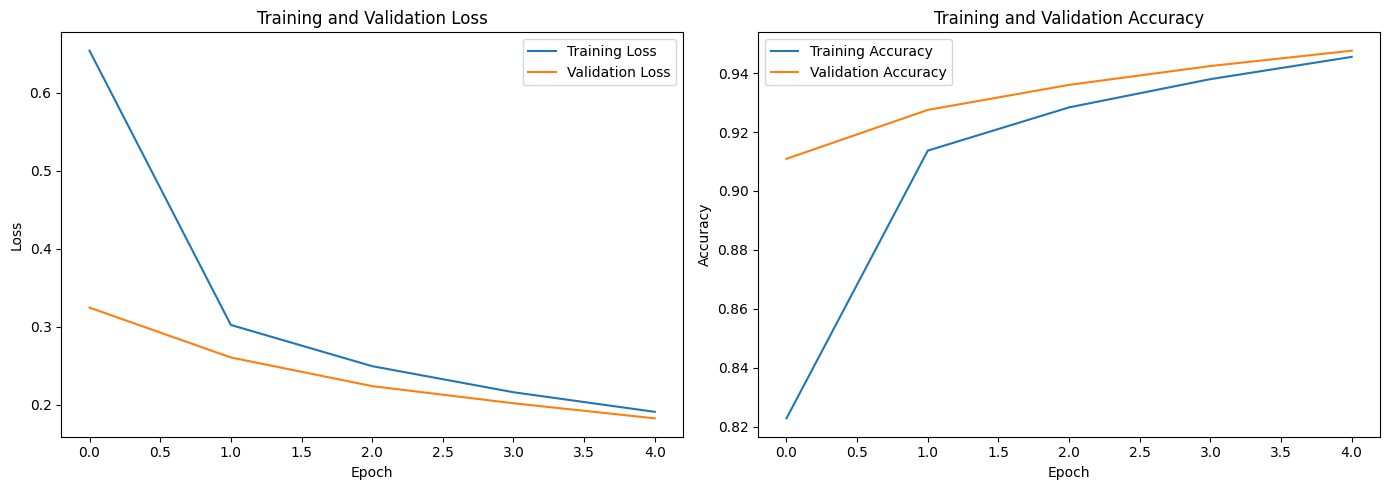

In [15]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()